# Unsupervised Machine Learning with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Objectives

* Learn what is unsupervised machine learning

* Group data with clustering

* Find underlying linear patterns with PCA

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Clustering

A series of techniques for finding clusters within datasets.

Clusters are groups of points that are closer to each other than to the rest.


<img src="clustering.png" alt="Clustering" style="height: 600px; float: left;"/>


# Generate random data

We're going to generate random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe. 

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
npoints = 200

np.random.seed(7)
centroids = np.random.randn(3,2)
centroids

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628],
       [-0.78892303,  0.00206557]])

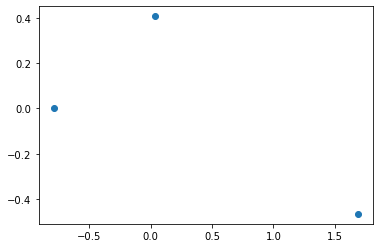

In [171]:
plt.scatter(centroids[:,0],centroids[:,1])

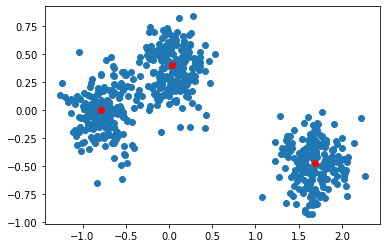

In [187]:
scale = .2

np.random.seed(7)

first_cluster = centroids[0,:] + np.random.randn(npoints,2)*scale
second_cluster = centroids[1,:] + np.random.randn(npoints,2)*scale
third_cluster = centroids[2,:] + np.random.randn(npoints,2)*scale

all_points = np.concatenate((first_cluster,second_cluster,third_cluster))

plt.scatter(all_points[:,0],all_points[:,1])
plt.scatter(centroids[:,0],centroids[:,1],c='red')

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

## K-means clustering

Very simple algorithm, quite fast:

- Throw K candidate cluster centers (_centroids_) randomly at the data.

- Assign points to the closest centroid.

- Update the centroid as the average of its observations.

- Repeat 2,3 until convergence.



```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    # or select K random points from data
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

#### Exercise

For 3 random starting points, calculate which is the closest for each of our points.

In [188]:
from scipy.spatial.distance import cdist

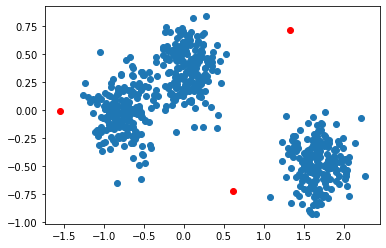

In [193]:
np.random.seed(10)

n_clusters = 3

initial_centroids = np.random.randn(n_clusters, 2)

plt.scatter(all_points[:,0],all_points[:,1])
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],c='red')

In [194]:
all_points.shape

(600, 2)

In [195]:
all_points[0,:]

array([ 2.02863084, -0.55912484])

In [199]:
initial_centroids.shape

(3, 2)

In [198]:
initial_centroids

array([[ 1.3315865 ,  0.71527897],
       [-1.54540029, -0.00838385],
       [ 0.62133597, -0.72008556]])

In [202]:
cdist(all_points,initial_centroids).shape

(600, 3)

In [196]:
cdist(all_points,initial_centroids)[0,:]

array([1.45257561, 3.61621545, 1.41646998])

In [200]:
#Esta función calcula la distancia de cada uno de los puntos a los centroides inciales
cluster = cdist(all_points,initial_centroids)

In [201]:
type(cluster)

numpy.ndarray

In [203]:
#Función que da la posición de los valores mínimos en el array "cluster"
np.argmin(cluster,axis=0)

array([ 97, 538, 192])

In [204]:
#Como queremos saber a qué centroide corresponde cada 
clusters = np.argmin(cluster,axis=1)
clusters

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,

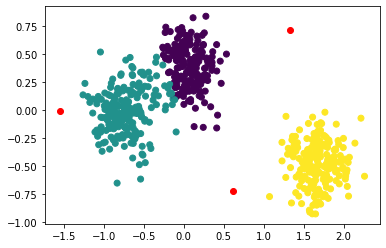

In [232]:
#IDefinimos una función para dibujar lo que hacemos

def plot(all_points,centroids, **kwargs):
    plt.scatter(all_points[:,0],all_points[:,1],**kwargs)
    plt.scatter(centroids[:,0],centroids[:,1], c= 'red')
    
plot(all_points,initial_centroids, c=clusters)

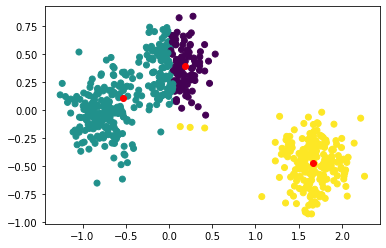

In [229]:
#Primera iteración donde se calculan los nuevos centroides en función de la media de las posiciones x e y,
#después de haber elegido los puntos en función de la distancia mínima del punto a los tres centroides.

for n in range(n_clusters):
    these = all_points[clusters == n]
    centroids[n,:] = np.mean(these,axis = 0)

plot(all_points,centroids,c=clusters)

In [233]:
#Segunda iteración

In [234]:
clusters = np.argmin(cdist(all_points,centroids),axis=1)

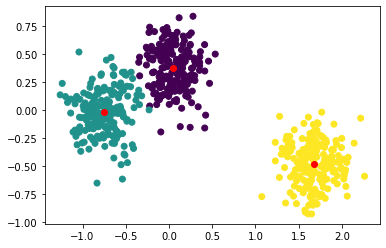

In [235]:
for n in range(n_clusters):
    these = all_points[clusters == n]
    centroids[n,:] = np.mean(these,axis = 0)

plot(all_points,centroids,c=clusters)

In [236]:
#Tercera iteración

In [237]:
clusters = np.argmin(cdist(all_points,centroids),axis=1)

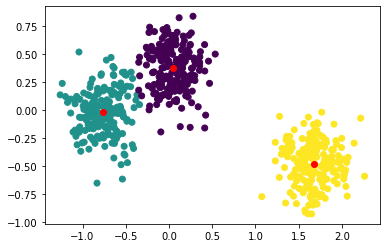

In [238]:
for cluster in range(n_clusters):
    these = all_points[clusters == cluster]
    
    centroids[cluster,:] = np.mean(these,axis = 0)

plot(all_points,centroids,c=clusters)

In [241]:
#############################################################################################################

In [20]:
#EXPLICACION DE SOBRE FUNCIONES

def my_f(*args, **kwargs):
    print(kwargs)
    
my_f(x=2, y=3)

{'x': 2, 'y': 3}


In [21]:
def my_f(*args, **kwargs):
    print(kwargs['x'])
    
my_f(x=2, y=3)

2


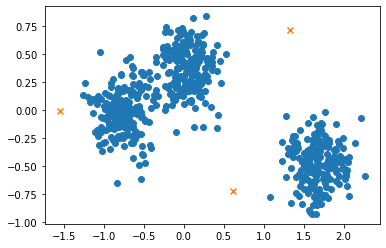

In [240]:
def plot_1(all_points,centroids, **kwargs):
    plt.scatter(all_points[:,0],all_points[:,1])
    plt.scatter(initial_centroids[:,0],initial_centroids[:,1],**kwargs)
    
plot_1(all_points,centroids, marker='x')

In [241]:
#############################################################################################################

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

Notice that class labels (kmeans) may not agree with original class number.

Now let's take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

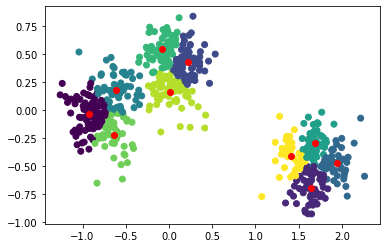

In [242]:
from sklearn.cluster import KMeans

kmeans = KMeans(10)
clusters = kmeans.fit_predict(all_points)

plot(all_points, kmeans.cluster_centers_,c=clusters)

### Practical: K-Means Clustering with sklearn

Download `players_20.csv` from [here](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv).

In [243]:
pd.options.display.max_columns = None

In [244]:
df = pd.read_csv('/home/dsc/Documents/Week_09_Unsup_Learning_Feature_Eng/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [245]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

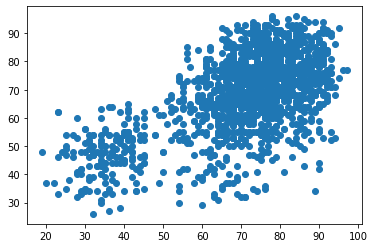

In [247]:
good = df[df['overall']>75]

plt.scatter(good['power_stamina'], good['movement_sprint_speed'])

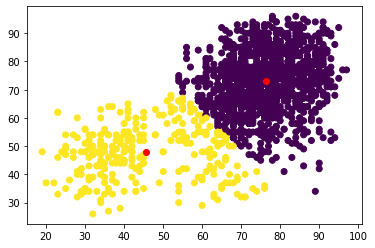

In [248]:
kmeans = KMeans(2)
clusters = kmeans.fit_predict(good[['power_stamina','movement_sprint_speed']])
plot(good[['power_stamina','movement_sprint_speed']].values,kmeans.cluster_centers_,c=clusters)

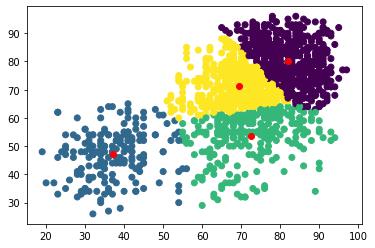

In [252]:
kmeans = KMeans(4)
clusters = kmeans.fit_predict(good[['power_stamina','movement_sprint_speed']])
plot(good[['power_stamina','movement_sprint_speed']].values,kmeans.cluster_centers_,c=clusters)

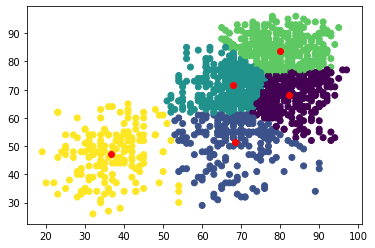

In [253]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(good[['power_stamina','movement_sprint_speed']])
plot(good[['power_stamina','movement_sprint_speed']].values,kmeans.cluster_centers_,c=clusters)

## The elbow method

To choose a number of clusters in KMeans

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


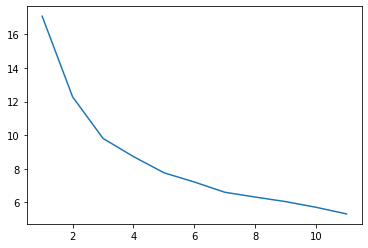

In [254]:
%time

data = good[['power_stamina','movement_sprint_speed']]
max_clusters = 12
clusterings = []
scores = []

for n_clusters in range(1,max_clusters):
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(data)
    
    distances = cdist(data, kmeans.cluster_centers_)
    
    score = np.mean(np.min(distances, axis=1))
    scores.append(score)
    clusterings.append(clusters)

plt.plot(range(1,max_clusters),scores)

In [257]:
scores

[17.07541023690607,
 12.280827710770101,
 9.806979981353095,
 8.72703276066853,
 7.763712294423641,
 7.214321512739935,
 6.604524420068772,
 6.319067236916922,
 6.046974732257152,
 5.710241059226532,
 5.315704182482416]

In [274]:
i=2
incr = (scores[i]-scores[i+1])/scores[i+1]*100
incr

12.374735494883552

In [277]:
increments = []

for i in range(len(scores)-1):
    incr = (scores[i]-scores[i+1])/scores[i+1]*100
    increments.append(incr)

increments

[39.04120014590867,
 25.225377579242114,
 12.374735494883552,
 12.407987695999545,
 7.615279977660052,
 9.233020485444928,
 4.517394299654976,
 4.499646793764687,
 5.897013270333491,
 7.422099936341239]

In [279]:
#Usando estos incrementos la mejor opción es 3 clusters ya que de 3 a 4 el ratio de mejora es constante y los 
#siguientes se mejora muy poco al aumentar el número de clusters.

## Hierarchical clustering

Instead of subdividing the observations, we join those that are similar to each other.

We can track the order in which we join them up and represent it as a _dendrogram_.

We don't need to specify the number of clusters beforehand.

<img src="https://i0.wp.com/datascienceplus.com/wp-content/uploads/2016/01/hclust.png" alt="Dendrogram" style="height: 600px; float: left;"/>


In [85]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None)

result = clustering.fit_predict(data)
result

array([1614, 1613, 1612, ...,    3,    1,    0])

In [86]:
#Dibujar dendograma --> from sklearn

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

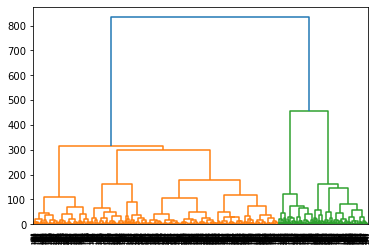

In [87]:
plot_dendrogram(clustering)

In [90]:
import sklearn
sklearn.__version__

'0.23.2'

### Distance measures in clustering

In any of these approaches, we need a measure of distance or similarity between points. 

In hierarchical clustering, we additionally need a measure of similarity between single points and groups of points.

How will this measures be influenced by the scale of our variables?

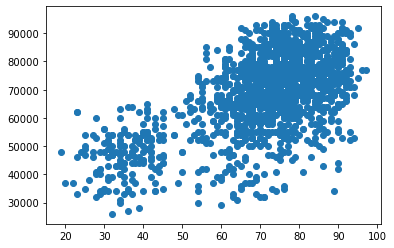

In [94]:
kmeans = KMeans(16)

X_1 = good['power_stamina']
X_2 = good['movement_sprint_speed']*1000

plt.scatter(X_1,X_2)


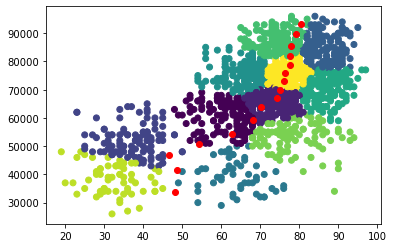

In [95]:
other_units = pd.concat([X_1,X_2],axis=1)

kmeans.fit_predict(other_units)

plot(other_units.values, kmeans.cluster_centers_,c=clusters)

### Clustering in scikit-learn

![Clustering algorithms in scikit-learn](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

## DBSCAN

There's also a hierarchical version.



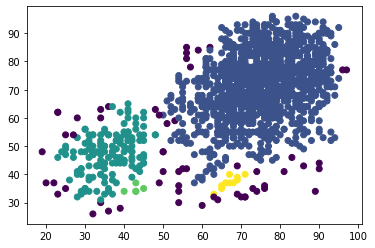

In [106]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 3)

clusters = dbscan.fit_predict(data)

plt.scatter(data['power_stamina'],data['movement_sprint_speed'], c = clusters)

In [107]:
#Número de clusters, siendo -1 los outliers (morados en el dibujo)
pd.Series(clusters).value_counts()

 0    1390
 1     152
-1      58
 3      10
 2       5
dtype: int64

## Measuring quality of clustering

### Elbow method

We've already seen it

### Silhouette

In [108]:
from sklearn.metrics import silhouette_score, silhouette_sample

In [110]:
help(silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster._unsupervised:

silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is 2 <= n_labels <= n_samples - 1.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indicate

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


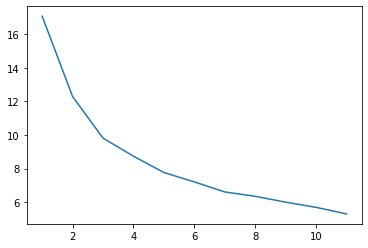

In [116]:
%time

data = good[['power_stamina','movement_sprint_speed']]
max_clusters = 12
clusterings = []
scores = []

for n_clusters in range(1,max_clusters):
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(data)
    
    distances = cdist(data, kmeans.cluster_centers_)
    
    score = np.mean(np.min(distances, axis=1))
    scores.append(score)
    clusterings.append(clusters)

plt.plot(range(1,max_clusters),scores)

<BarContainer object of 10 artists>

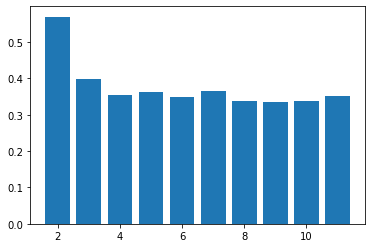

In [118]:
silhouettes = []

for clustering in clusterings[1:]:
    silhouettes.append(silhouette_score(data,clustering))
    
plt.bar(range(2, max_clusters), silhouettes)

## Dimensionality reduction

### Principal Component Analysis (PCA)

A dimensionality reduction technique

![PCA as base change](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

* Now let's apply PCA to our dataset.


In [119]:
good.select_dtypes('number')

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,245326,35,176,76,76,76,0,0,1,2,2,NaN,NaN,NaN,19.0,65.0,53.0,63.0,61.0,72.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,48,45,60,77,53,50,47,44,76,70,58,70,77,79,76,65,81,88,80,62,83,70,36,52,62,80,74,77,68,7,12,10,16,9
1611,245327,31,180,71,76,76,0,0,1,3,3,NaN,NaN,NaN,11.0,76.0,76.0,61.0,73.0,33.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,61,78,77,62,77,76,62,63,55,75,73,78,62,79,56,76,55,61,69,73,57,34,72,65,64,65,31,23,22,8,14,12,16,12
1612,251691,38,182,78,76,76,0,0,2,3,3,NaN,NaN,NaN,17.0,57.0,78.0,81.0,77.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80,68,41,80,81,74,86,91,79,85,59,55,72,76,72,86,77,74,58,89,38,55,76,80,86,70,40,26,15,6,11,8,6,10
1613,251692,33,194,83,76,76,0,0,2,3,2,NaN,NaN,NaN,6.0,33.0,47.0,54.0,49.0,76.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,54,39,75,64,54,45,42,35,51,60,34,32,32,71,33,70,64,71,89,42,86,71,29,44,57,65,76,78,80,16,6,13,7,13


In [124]:
good.select_dtypes('object').head()

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,NaN,2004-07-01,NaN,"Beat Offside Trap, Argues with Officials, Earl...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,NaN,2018-07-10,LS,"Long Throw-in, Selfish, Argues with Officials,...",91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,Yes,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,NaN,2017-08-03,LW,"Power Free-Kick, Injury Free, Selfish, Early C...",84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,1993-01-07,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,Yes,NaN,GK,NaN,2014-07-16,GK,"Flair, Acrobatic Clearance",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,1991-01-07,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,"#Speedster, #Dribbler, #Acrobat",LW,NaN,2019-07-01,LF,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


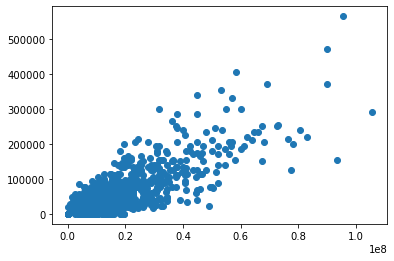

In [120]:
plt.scatter(good['value_eur'],good['wage_eur'])

In [121]:
#Esto nos dice que estas dos variables son redundantes

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

numeric = good.select_dtypes('number')
numeric = numeric.fillna(numeric.median())

normalized = scaler.fit_transform(numeric)

pca = PCA()

transformed = pca.fit_transform(normalized)
transformed

array([[-8.64602536e+00,  7.56559468e+00,  1.13417779e+01, ...,
         2.69505136e-02,  1.66077339e-03,  2.58564859e-02],
       [-6.59174378e+00,  5.14935710e+00,  8.74832041e+00, ...,
        -3.81666336e-02,  8.06405551e-03,  2.07988465e-03],
       [-8.13876304e+00,  8.02615524e+00,  8.97622049e+00, ...,
        -4.97864971e-02,  1.03156563e-04,  1.15824326e-02],
       ...,
       [-2.44677903e+00,  2.32116156e+00, -2.95421127e+00, ...,
        -2.46905015e-02,  1.77025086e-02, -1.18143878e-02],
       [ 4.73135767e+00, -6.43098154e+00, -8.90991370e-01, ...,
         1.58827125e-02, -5.91597955e-03, -6.69274674e-03],
       [-1.70380261e+00, -8.50535126e-01, -1.78665785e+00, ...,
         1.59476591e-02, -3.05021245e-02, -3.81250322e-02]])

In [127]:
numeric.shape

(1615, 61)

In [129]:
#No hemso reducido la dimensionalidad
normalized.shape

(1615, 61)

<AxesSubplot:>

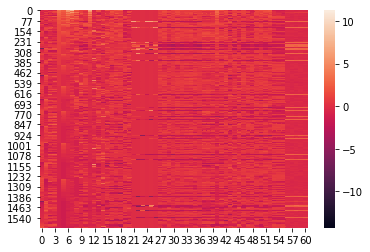

In [131]:
import seaborn as sns

sns.heatmap(normalized)

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


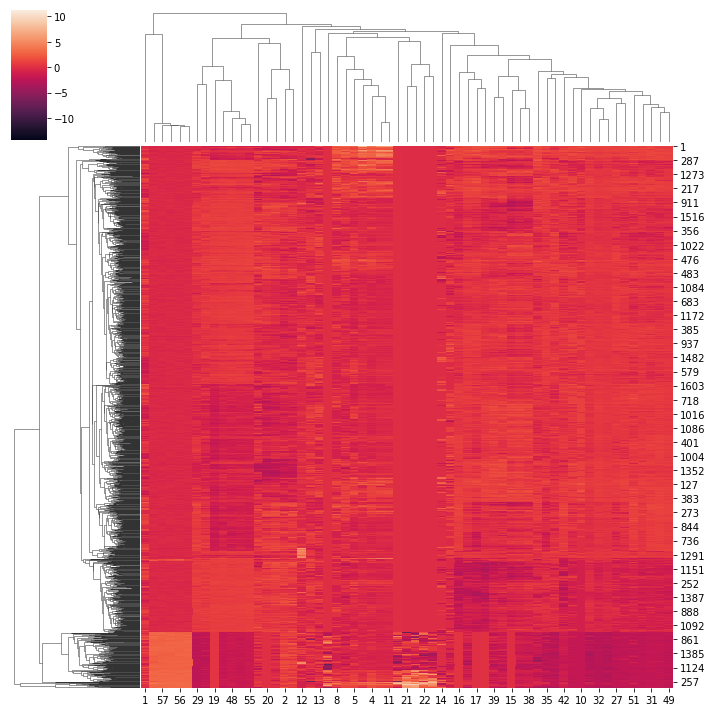

In [132]:
sns.clustermap(normalized)

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


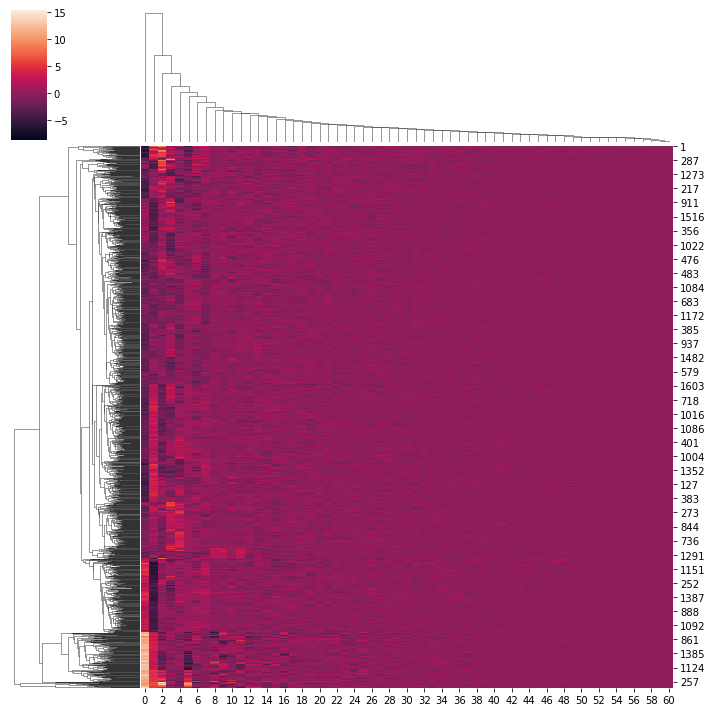

In [133]:
sns.clustermap(transformed)

In [134]:
#Se ve que no hay relación entre variables

In [135]:
pca.components_.shape

(61, 61)

In [136]:
numeric.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [139]:
pca.components_[0,:]

array([-0.01809494,  0.03451692,  0.13003018,  0.11945099, -0.02972581,
       -0.02759735, -0.05605585, -0.05053949, -0.03249042, -0.08391724,
       -0.18832163, -0.05380767, -0.00399439, -0.01615324, -0.03074884,
       -0.05531715, -0.06620551, -0.08184573, -0.08921119,  0.07537903,
        0.05805844,  0.04292074,  0.02934017, -0.01648905,  0.03031346,
       -0.02949457,  0.0203511 , -0.19864375, -0.18801795, -0.11681842,
       -0.19946414, -0.1873057 , -0.2124759 , -0.19961441, -0.18208828,
       -0.16993817, -0.21086768, -0.15391726, -0.14238769, -0.16152653,
       -0.06044594, -0.16086236, -0.15056448,  0.01482258, -0.17410782,
        0.03919682, -0.19793707, -0.1038528 , -0.06601003, -0.20004596,
       -0.16277823, -0.17701111, -0.16023479, -0.07524484, -0.07194317,
       -0.06031368,  0.18728034,  0.18665214,  0.18506437,  0.18755375,
        0.18748145])

In [141]:
list(zip(numeric.columns,pca.components_[:,1]))

[('sofifa_id', 0.03451692456596467),
 ('age', -0.014750634275480706),
 ('height_cm', -0.03982183023602227),
 ('weight_kg', 0.36271371993172563),
 ('overall', -0.21104039341608333),
 ('potential', 0.05796235765465412),
 ('value_eur', 0.2928451833741373),
 ('wage_eur', -0.030676931283999252),
 ('international_reputation', -0.010914666587282917),
 ('weak_foot', 0.04308542506018834),
 ('skill_moves', 0.07456159201813124),
 ('release_clause_eur', -0.07539946049076031),
 ('team_jersey_number', 0.020447141196866657),
 ('contract_valid_until', 0.012403276303582431),
 ('nation_jersey_number', 0.1728862731789298),
 ('pace', -0.20632545243275308),
 ('shooting', -0.19200450205066247),
 ('passing', -0.13767829637569556),
 ('dribbling', 0.04478624438172536),
 ('defending', -0.2545360192621252),
 ('physic', 0.10463538566844974),
 ('gk_diving', -0.12695066454635007),
 ('gk_handling', 6.824864270359166e-05),
 ('gk_kicking', -0.010685503706091393),
 ('gk_reflexes', -0.08891997446988915),
 ('gk_speed', -

In [142]:
list(zip(numeric.columns,pca.components_[:,2]))

[('sofifa_id', 0.13003017761140578),
 ('age', -0.10079678177490611),
 ('height_cm', 0.0930462800480375),
 ('weight_kg', 0.1429604423263452),
 ('overall', 0.22701427791323872),
 ('potential', -0.06613248141117675),
 ('value_eur', -0.15618991988095243),
 ('wage_eur', -0.03984482221627024),
 ('international_reputation', 0.07801814508231078),
 ('weak_foot', -0.03371790740083745),
 ('skill_moves', -0.08087833627745836),
 ('release_clause_eur', -6.019036896409225e-05),
 ('team_jersey_number', -0.25199380602288607),
 ('contract_valid_until', 0.09816911352852968),
 ('nation_jersey_number', 0.059672328109003504),
 ('pace', 0.04247742156164718),
 ('shooting', 0.07106861440001404),
 ('passing', 0.1815967033386765),
 ('dribbling', -0.22889374807633872),
 ('defending', -0.14037144026794388),
 ('physic', -0.03539949882689632),
 ('gk_diving', 0.15601418801038575),
 ('gk_handling', -0.038874293578614966),
 ('gk_kicking', 0.05377785568638682),
 ('gk_reflexes', -0.26639665207595287),
 ('gk_speed', -0.12

In [143]:
np.dot(pca.components_[:,0],pca.components_[:,1])

3.7644748802293914e-16

In [144]:
pca.explained_variance_

array([2.09702955e+01, 9.33528518e+00, 5.71205770e+00, 3.71870188e+00,
       2.92380228e+00, 2.47148176e+00, 1.78208882e+00, 1.31347959e+00,
       1.09358479e+00, 1.02872387e+00, 9.16380559e-01, 8.94574142e-01,
       7.92570804e-01, 7.11239926e-01, 6.40165138e-01, 5.56091869e-01,
       5.11143555e-01, 4.76618158e-01, 4.10546125e-01, 3.67649730e-01,
       3.20012005e-01, 3.10770522e-01, 2.85173582e-01, 2.73533739e-01,
       2.59231728e-01, 2.31050602e-01, 2.18578865e-01, 2.14028249e-01,
       2.01631696e-01, 1.83684265e-01, 1.73529112e-01, 1.65647910e-01,
       1.45061355e-01, 1.34787634e-01, 1.24633221e-01, 1.16677532e-01,
       1.03052746e-01, 9.90606281e-02, 9.44621079e-02, 9.02725275e-02,
       7.97524032e-02, 7.77134164e-02, 5.81147462e-02, 5.44497163e-02,
       5.36778400e-02, 5.03006963e-02, 4.34394686e-02, 4.19105966e-02,
       3.68694675e-02, 2.23350877e-02, 2.18790841e-02, 2.11585893e-02,
       2.03233340e-02, 1.95615520e-02, 1.83315140e-02, 1.75543181e-02,
      

<BarContainer object of 61 artists>

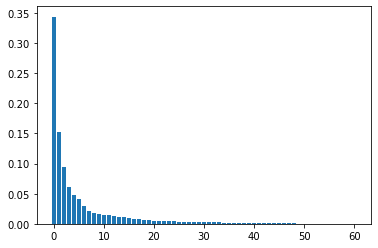

In [167]:
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)

In [146]:
#LA VARIANZA EXPLICADA ES EL % DE VARIANZA EXPLICADA POR CADA COMPONENTE

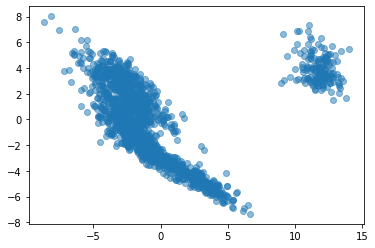

In [148]:
plt.scatter(transformed[:,0],transformed[:,1], alpha=.5)

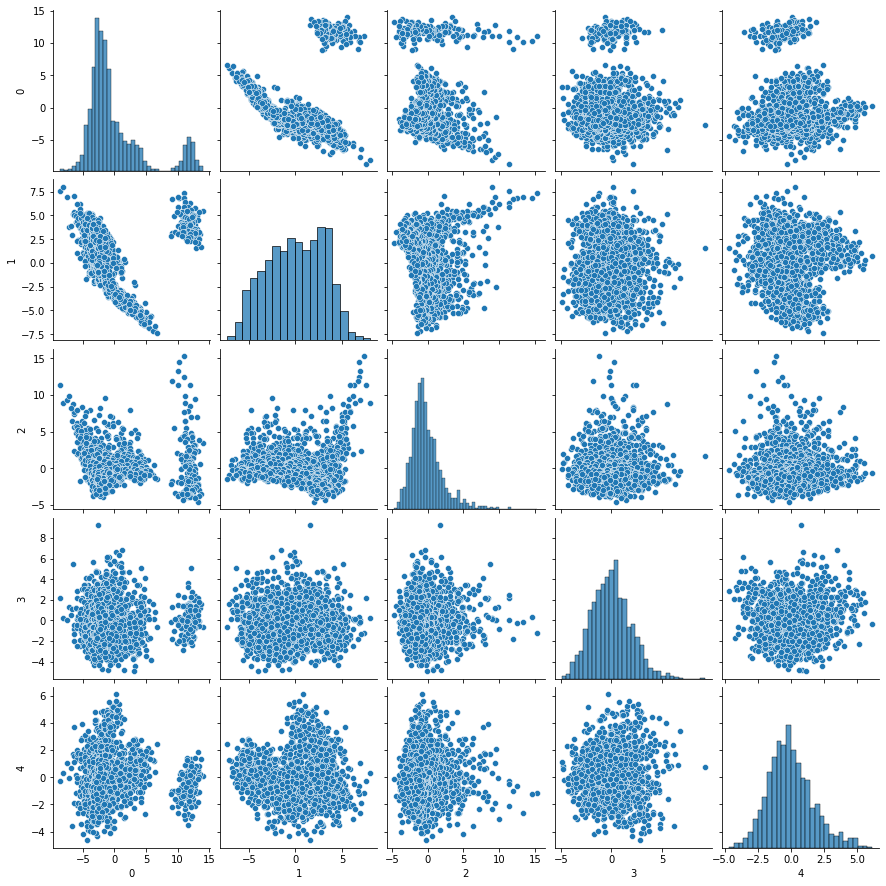

In [151]:
sns.pairplot(pd.DataFrame(transformed[:,:5]))

In [153]:
clustering = DBSCAN()
clusters = clustering.fit_predict(transformed[:,:5])
pd.Series(clusters).value_counts()

-1    1615
dtype: int64

In [155]:
clustering = DBSCAN(eps=3)
clusters = clustering.fit_predict(transformed[:,:5])
pd.Series(clusters).value_counts()

 0    1442
 2     158
-1       9
 1       6
dtype: int64

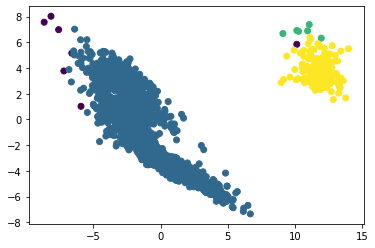

In [157]:
plt.scatter(transformed[:,0],transformed[:,1],c=clusters)

In [160]:
sorted(zip(numeric.columns,pca.components_[:,0]),key=lambda t: -abs(t[1]))

[('gk_kicking', -0.4744180767359849),
 ('weight_kg', -0.34792540714426085),
 ('gk_diving', -0.3259674978920572),
 ('value_eur', -0.2854769473990443),
 ('nation_jersey_number', -0.2678493173993193),
 ('physic', -0.259442746406455),
 ('overall', 0.2087745363393645),
 ('pace', -0.19736753666464263),
 ('defending', -0.1934097745707541),
 ('skill_dribbling', -0.17081528662358633),
 ('attacking_crossing', -0.17039809282657667),
 ('gk_handling', 0.13961854849680685),
 ('dribbling', -0.1322855070951158),
 ('gk_positioning', -0.12304247194526355),
 ('attacking_short_passing', -0.11939459693926927),
 ('gk_reflexes', -0.11493928972850767),
 ('team_jersey_number', 0.11168984052087984),
 ('attacking_finishing', -0.10412187251109291),
 ('skill_moves', -0.08395104369135323),
 ('passing', -0.08357318403099681),
 ('weak_foot', -0.0734264749571038),
 ('gk_speed', -0.07139931776316308),
 ('international_reputation', -0.04531032196604299),
 ('attacking_heading_accuracy', -0.043950989263544),
 ('movement_a

In [161]:
sorted(zip(numeric.columns,pca.components_[:,1]),key=lambda t: -abs(t[1]))

[('weight_kg', 0.36271371993172563),
 ('power_strength', 0.3266637760655412),
 ('attacking_crossing', -0.31372118632147594),
 ('value_eur', 0.2928451833741373),
 ('skill_dribbling', -0.27450701972116437),
 ('defending', -0.2545360192621252),
 ('gk_speed', -0.21321133418915644),
 ('overall', -0.21104039341608333),
 ('pace', -0.20632545243275308),
 ('shooting', -0.19200450205066247),
 ('gk_positioning', -0.17761666494916145),
 ('nation_jersey_number', 0.1728862731789298),
 ('mentality_aggression', -0.14194725076510592),
 ('passing', -0.13767829637569556),
 ('mentality_positioning', 0.13646834983646589),
 ('skill_fk_accuracy', -0.12907452166195113),
 ('gk_diving', -0.12695066454635007),
 ('power_jumping', 0.10879348168970301),
 ('power_shot_power', -0.10488436946917386),
 ('physic', 0.10463538566844974),
 ('mentality_interceptions', -0.09447203282123488),
 ('gk_reflexes', -0.08891997446988915),
 ('movement_acceleration', -0.0819342499805279),
 ('release_clause_eur', -0.07539946049076031),

In [163]:
np.sum(np.dot(normalized,pca.components_) - transformed)

-2.5980995133068063e-11

In [ ]:
#Un fit en PCA equivale a encontrar components_

In [164]:
pca.components_[:,:10].shape

(61, 10)

In [165]:
np.dot(normalized,pca.components_[:,:10]).shape

(1615, 10)

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[A comparison of classifiers available in scikit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[An amazing explanation of the kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Clustering in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

[Ensemble methods in scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

[An example of customer segmentation](https://www.kaggle.com/fabiendaniel/customer-segmentation)

[Hands-on ML](https://github.com/ageron/handson-ml2)

[Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)